Imports


In [24]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Loading opinion from .json files


In [ ]:
print(*[filename.split(".")[0] for filename in os.listdir("./opinions")], sep="\n")

In [26]:
product_id = input("Enter product code, please: ")

In [ ]:
opinions = pd.read_json(f"./opinions/{product_id}.json")
opinions

Basic Statistics

In [ ]:
opinions_count = opinions.shape[0]
pros_count = opinions.pros_pl.astype(bool).sum()
cons_count = opinions.cons_pl.astype(bool).sum()
pros_cons_count = opinions.apply(lambda o: bool(o.pros_pl) and bool(o.cons_pl), axis=1).sum()
average_rate = opinions.stars.mean()
print(f"Number of opinins about the product: {opinions_count}")
print(f"Number of opinions in which advantages have been listed: {pros_count}")
print(f"Number of opinions in which disadvantages have been listed: {cons_count}")
print(f"Number of opinions in which both advantages and disadvantages have been listed: {pros_cons_count}")
print(f"The average rate of the product: {average_rate:.2f}")


In [ ]:
pros = opinions.pros_en.explode().value_counts()
cons = opinions.cons_en.explode().value_counts()
print(pros)
print(cons)

Charts 

In [ ]:
recommendations = opinions.recommendation.value_counts(dropna=False).reindex([False, True, np.nan], fill_value=0)
recommendations

In [ ]:
recommendations.plot.pie(
    label = "",
    labels = ["Not recommend", "Recommend", "No opinion"],
    colors = ["crimson", "green", "silver"],
    autopct = lambda v: f"{v:.1f}%" if v > 0 else "",
    title = f"Share of recommendations in the total number of opinions \nabout the product {product_id}"
)
plt.show()

In [34]:
stars = opinions.stars.value_counts()
stars

stars
5.0    25
4.5     2
4.0     1
Name: count, dtype: int64

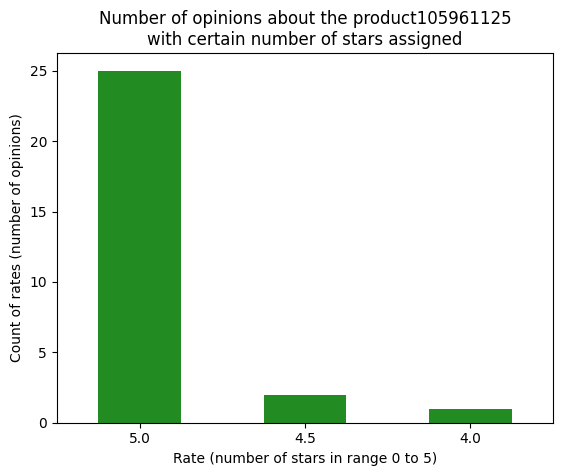

In [35]:
stars.plot.bar(
    xlabel = "Rate (number of stars in range 0 to 5)",
    ylabel = "Count of rates (number of opinions)",
    title = f"Number of opinions about the product{product_id}\nwith certain number of stars assigned",
    color = {"crimson" if x<3 else "forestgreen" if x>3.5 else "silver" for x in stars.index}
)
plt.xticks(rotation=0)
plt.show()